# Modeling

**Modeling** adalah tahap di mana data yang telah dipersiapkan digunakan untuk membangun **model prediktif atau deskriptif** menggunakan algoritma tertentu.

Tujuan utama dari tahap ini adalah **menciptakan model** yang mampu mempelajari pola dari data dan mampu melakukan **prediksi atau pengelompokan** terhadap data baru.

---

### ⚙️ Aktivitas Utama dalam Modeling:

1. **Memilih teknik pemodelan yang sesuai**
   - Bergantung pada tujuan (klasifikasi, regresi, clustering, dll)
   - Contoh:
     - Klasifikasi: Decision Tree, SVM, Naive Bayes
     - Clustering: K-Means, DBSCAN
     - Regresi: Linear Regression

2. **Membangun model (training)**
   - Model dilatih menggunakan data latih (training set)
   - Proses ini melibatkan "belajar" dari data historis

3. **Menguji model**
   - Model diuji menggunakan data uji (testing set)
   - Tujuannya adalah melihat seberapa baik model memprediksi data yang belum pernah dilihat

4. **Tuning parameter (hyperparameter tuning)**
   - Mencari kombinasi parameter terbaik untuk meningkatkan performa model
   - Contoh: memilih jumlah `k` pada K-Nearest Neighbors

5. **Validasi model**
   - Menggunakan metode seperti:
     - Cross Validation (k-fold)
     - Confusion Matrix
     - Accuracy, Precision, Recall, F1-score (untuk klasifikasi)
     - Mean Squared Error, R² (untuk regresi)

---

### 📌 Output Tahap Modeling

- Model yang siap diuji dan dievaluasi
- Pemahaman awal terhadap kinerja model
- Parameter yang digunakan

---

### 💡 Tips Penting

- Pastikan data sudah **bersih dan terstandardisasi** sebelum modeling.
- Gunakan teknik validasi yang tepat agar tidak **overfitting**.
- Tidak semua model cocok untuk semua jenis data — **eksperimen sangat penting**.



## 📌 Clustering dengan K-Means

**K-Means** adalah algoritma _unsupervised learning_ yang umum digunakan untuk **clustering**. Meskipun bukan algoritma klasifikasi dalam arti sebenarnya, hasil klasterisasi dari K-Means sering digunakan untuk _pseudo-klasifikasi_, terutama saat label kelas tersedia setelah proses clustering.

---

### ⚙️ Langkah-langkah Algoritma K-Means

Tujuan utama K-Means adalah untuk membagi data ke dalam \\( K \\) kelompok atau _cluster_ berdasarkan kedekatan jarak (biasanya jarak Euclidean).

Langkah-langkah algoritma:

1. Pilih jumlah klaster \\( K \\).
2. Inisialisasi \\( K \\) centroid secara acak.
3. Ulangi hingga konvergen:
   - **Assign data ke centroid terdekat:**

  $$
  C_i = \left\{ x_j : \| x_j - \mu_i \|^2 \leq \| x_j - \mu_k \|^2 \quad \forall k = 1, ..., K \right\}
  $$

   - **Update posisi centroid:**

     $$
     \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
     $$

---

### 🧠 Klasifikasi Menggunakan Hasil K-Means

Jika label kelas tersedia, kita dapat menetapkan label mayoritas pada tiap klaster sebagai label prediksi.

Untuk setiap klaster \\( i \\), kita cari label terbanyak (_mode_) dari data dalam klaster tersebut dan menganggapnya sebagai label klasifikasi untuk semua anggota klaster itu.

---

### 📚 Kelebihan dan Kekurangan K-Means

**✅ Kelebihan:**
- Sederhana dan cepat.
- Efektif untuk dataset besar.

**❌ Kekurangan:**
- Harus menentukan \\( K \\) di awal.
- Sensitif terhadap posisi awal centroid.
- Tidak cocok untuk bentuk klaster yang kompleks atau non-linier.
- Tidak tahan terhadap outlier.

---

### 📌 Catatan

Jika ingin menggunakan K-Means untuk klasifikasi, pastikan untuk:
- Menyediakan label sebenarnya setelah clustering.
- Menggunakan evaluasi seperti akurasi untuk membandingkan label hasil klaster dengan label asli.


## Klasifikasi K-Mean

### Install Library Pendukung

In [2]:
!pip install matplotlib seaborn
!pip install pymysql
!pip insinstalltall pymysql pandas
!psycopgpsycopg2all2all psypsycopg2copg2
!pip install mysql-connector-python
!pip install mysql-connector-python psycopg2-binary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00
ERROR: unknown command "insinstalltall" - maybe you meant "uninstall"
/bin/bash: line 1: psycopgpsycopg2all2all: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.1 MB/s eta 0:00:00


### Membaca File CSV

In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset dari file CSV
df = pd.read_csv("Iris.csv")

# Tampilkan 5 data pertama
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Memilih Kolom Atribut untuk Cluster

In [74]:
# Pilih kolom Atribut untuk clustering
selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[selected_columns]

# Imputasi nilai kosong (jika ada)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalisasi data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


### Mengelompokkan Data

In [75]:
K = 3  # jumlah klaster
# Menentukan jumlah klaster yang akan dibentuk oleh algoritma K-Means

# Jalankan KMeans
kmeans = KMeans(n_clusters=K, random_state=42)  # Membuat objek KMeans dengan 2 klaster dan random seed 42 agar hasil konsisten
kmeans.fit(X_scaled)  # Menjalankan proses K-Means clustering pada data yang telah dinormalisasi

# Simpan hasil klaster
df['Cluster'] = kmeans.labels_  # Menambahkan kolom baru 'Cluster' ke DataFrame, berisi label klaster hasil clustering

# Tampilkan centroid dan label
print("Centroid:\n", kmeans.cluster_centers_)  # Menampilkan koordinat centroid dari masing-masing klaster dalam skala hasil standardisasi
print("\nLabels:\n", kmeans.labels_)  # Menampilkan label klaster dari setiap data point


Centroid:
 [[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]

Labels:
 [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 2 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


### Implementasi algoritma K-Means clustering secara manual (tanpa menggunakan sklearn.KMeans)

In [76]:
# --- IMPUTASI NILAI HILANG JIKA ADA ---
imputer = SimpleImputer(strategy='mean')  # Gunakan rata-rata untuk mengisi nilai yang hilang
X_imputed = imputer.fit_transform(X)      # Terapkan imputasi pada data fitur X

# --- DEFINISI K-MEANS MANUAL ---
def euclidean_distance(a, b):
    a = np.asarray(a)                      # Konversi ke array NumPy
    b = np.asarray(b)
    return np.linalg.norm(a - b, axis=1)   # Hitung jarak Euclidean antar vektor data dan centroid

def initialize_centroids(X, k):
    np.random.seed(42)                     # Seed acak untuk hasil yang konsisten
    indices = np.random.choice(len(X), k, replace=False)  # Ambil k indeks acak sebagai centroid awal
    return X[indices]                      # Kembalikan centroid awal berdasarkan indeks tersebut

def assign_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids]).T
    # Hitung jarak dari tiap titik ke tiap centroid, kemudian transpose agar bentuknya (n_samples, n_clusters)
    return np.argmin(distances, axis=1)    # Tentukan klaster (berdasarkan jarak terdekat) untuk tiap titik

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))  # Inisialisasi centroid baru
    for i in range(k):
        cluster_points = X[labels == i]        # Ambil semua titik yang termasuk ke cluster i
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)  # Hitung rata-rata sebagai centroid baru
        else:
            print(f"Warning: Cluster {i} is empty. Reinitializing centroid.")
            new_centroids[i] = initialize_centroids(X, 1)[0]  # Jika kosong, pilih ulang satu centroid acak
    return new_centroids


### Inisialisasi Centroid

In [77]:
# --- EKSEKUSI ITERASI ---
centroids = initialize_centroids(X_imputed, K)   # Inisialisasi centroid awal secara acak
prev_centroids = centroids.copy()                # Salin centroid sebagai acuan perbandingan iterasi selanjutnya
iteration = 0                                    # Hitung iterasi dimulai dari 0
max_iter = 100                                   # Batas maksimum iterasi untuk mencegah infinite loop
tol = 1e-4                                       # Toleransi perubahan centroid untuk menentukan konvergensi

print(f"Starting K-Means dengan K={K}")          # Informasi jumlah cluster saat mulai

while iteration < max_iter:                      # Ulangi selama belum mencapai iterasi maksimum
    labels = assign_clusters(X_imputed, prev_centroids)     # Tentukan klaster untuk setiap titik berdasarkan centroid saat ini
    new_centroids = update_centroids(X_imputed, labels, K)  # Perbarui centroid berdasarkan rata-rata titik tiap klaster

    if np.allclose(new_centroids, prev_centroids, atol=tol):  # Cek apakah perubahan centroid cukup kecil (konvergen)
        print(f"Konvergen di iterasi ke-{iteration + 1}")      # Cetak informasi konvergensi
        break                                                  # Hentikan iterasi jika sudah konvergen

    prev_centroids = new_centroids     # Perbarui centroid lama dengan yang baru
    iteration += 1                     # Tambah hitungan iterasi
else:
    print(f"Mencapai iterasi maksimum ({max_iter}) tanpa konvergensi.")  # Jika loop selesai tanpa konvergen, tampilkan info


Starting K-Means dengan K=3
Konvergen di iterasi ke-6


### Output

In [78]:
final_centroids = prev_centroids  # Simpan centroid terakhir sebagai hasil akhir clustering
final_labels = assign_clusters(X_imputed, final_centroids)  # Tentukan kembali label klaster untuk semua data berdasarkan centroid final

print(f"Iterasi selesai setelah {iteration} iterasi.")  # Tampilkan jumlah iterasi yang dijalankan
print("Centroid akhir:")  # Tampilkan informasi teks sebelum mencetak centroid
print(pd.DataFrame(final_centroids, columns=selected_columns))  # Cetak posisi akhir centroid dalam bentuk tabel (DataFrame)


Iterasi selesai setelah 5 iterasi.
Centroid akhir:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       5.901613      2.748387       4.393548      1.433871
1       5.006000      3.418000       1.464000      0.244000
2       6.850000      3.073684       5.742105      2.071053


### Jarak euclidian distance

In [79]:
from scipy.spatial.distance import cdist

# Hitung jarak Euclidean dari setiap data ke setiap centroid
euclidean_distances = cdist(X_imputed, final_centroids, metric='euclidean')

# Konversi ke DataFrame agar lebih mudah dibaca
distance_df = pd.DataFrame(euclidean_distances, columns=[f'Centroid_{i}' for i in range(final_centroids.shape[0])])

# Tampilkan semua jarak
print("Jarak Euclidean ke masing-masing centroid:")
print(distance_df.head())


Jarak Euclidean ke masing-masing centroid:
   Centroid_0  Centroid_1  Centroid_2
0    3.419251    0.146942    5.059542
1    3.398574    0.438169    5.114943
2    3.569357    0.412301    5.279355
3    3.422410    0.518837    5.153590
4    3.467264    0.197970    5.104334


### Visualisasi Clustering K-means

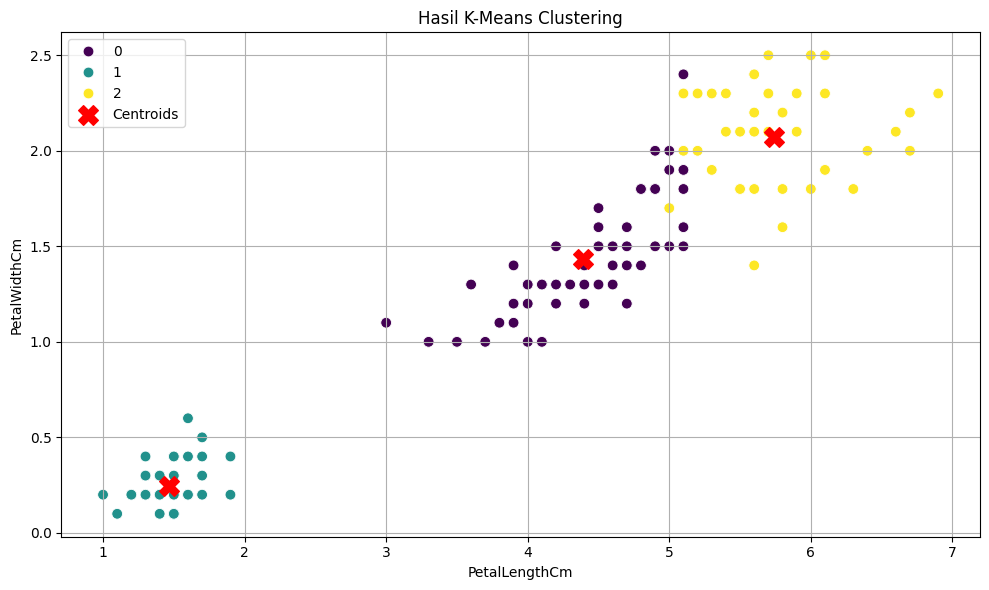

In [80]:
import seaborn as sns

# Ambil dua fitur untuk visualisasi
# Sesuaikan dengan nama kolom yang sebenarnya di DataFrame Anda
x_axis = 'PetalLengthCm'
y_axis = 'PetalWidthCm'

# Buat DataFrame hasil clustering dengan menggabungkan df asli dan hasil clustering
plot_df = df.copy() # Copy the original DataFrame
plot_df['cluster'] = final_labels # Add the cluster labels

# Plot data point
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x=x_axis, y=y_axis, hue='cluster', palette='viridis', s=60)

# Plot centroid
# Pastikan indeks yang digunakan untuk centroid sesuai dengan urutan selected_columns
# selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Index untuk PetalLengthCm adalah 2, untuk PetalWidthCm adalah 3
plt.scatter(
    final_centroids[:, selected_columns.index(x_axis)],
    final_centroids[:, selected_columns.index(y_axis)],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title('Hasil K-Means Clustering')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Hitung Inertia

In [83]:
print(f"Inertia dari {K}:", kmeans.inertia_) # Cukup panggil library saja

Inertia dari 3: 192.03717409190025


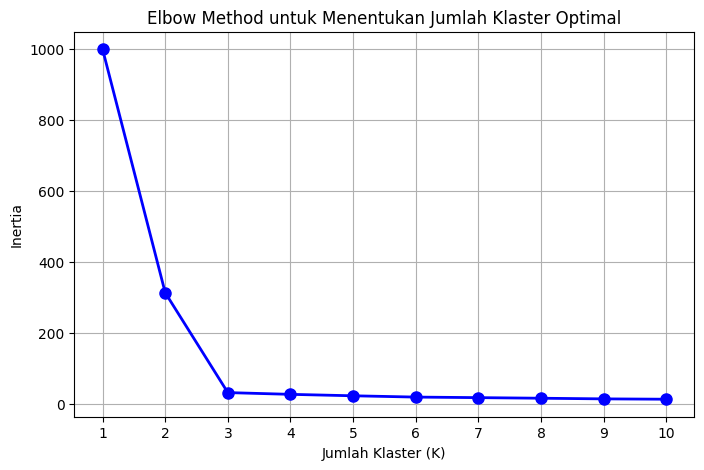

In [86]:
# Visualisasi Inertia
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow_method(X, max_k=10):
    """
    Menghitung inertia untuk tiap nilai K dan menampilkan grafik elbow.

    Parameters:
        X (array-like): Data fitur yang sudah diproses (misal: sudah diskalakan).
        max_k (int): Jumlah maksimum K yang akan diuji.
    """
    inertia_values = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)  # Simpan nilai inertia

    # Plot grafik elbow
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k + 1), inertia_values, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Jumlah Klaster (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()

plot_elbow_method(X_scaled, max_k=10)


### Hitung Shillouette

In [84]:
import numpy as np
from sklearn.metrics import silhouette_score   # Untuk menghitung skor silhouette clustering
from sklearn.cluster import KMeans              # Algoritma KMeans clustering
from sklearn.preprocessing import StandardScaler # Untuk standarisasi fitur data

def find_optimal_k(X, max_k=10):
    """
    Mencari nilai K optimal untuk K-Means berdasarkan Silhouette Score.

    Parameters:
        X (array-like): Data yang akan di-cluster.
        max_k (int): Jumlah maksimum K yang akan diuji.

    Returns:
        best_k (int): Nilai K terbaik berdasarkan Silhouette Score.
        silhouette_scores (list): Daftar Silhouette Score untuk setiap K.
    """
    silhouette_scores = []  # List untuk menyimpan skor silhouette tiap K

    # Loop untuk mencoba nilai K dari 2 sampai max_k
    for k in range(2, max_k + 1):
        # Buat model KMeans dengan k cluster, seed 42 agar hasil konsisten
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

        # Jalankan clustering dan dapatkan label cluster tiap data
        labels = kmeans.fit_predict(X)

        # Jika clustering menghasilkan hanya 1 cluster, skor silhouette tidak valid
        if len(np.unique(labels)) == 1:
            silhouette_scores.append(-1)  # Beri nilai -1 sebagai tanda tidak valid
            continue  # Lanjutkan ke k berikutnya

        # Hitung silhouette score untuk hasil clustering ini
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)  # Simpan skor

        print(f"K={k}, Silhouette Score: {score:.4f}")  # Tampilkan skor untuk tiap K

    # Temukan indeks K dengan skor silhouette tertinggi
    best_k = np.argmax(silhouette_scores) + 2
    # +2 karena range K mulai dari 2, jadi index 0 di silhouette_scores = K=2

    print(f"\nNilai K optimal: {best_k} (Silhouette Score: {max(silhouette_scores):.4f})")

    # Kembalikan nilai K terbaik dan daftar skor silhouette
    return best_k, silhouette_scores

# Contoh penggunaan fungsi:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    # Buat data contoh dengan 3 cluster
    X, _ = make_blobs(n_samples=500, centers=3, random_state=42)

    scaler = StandardScaler()  # Inisialisasi scaler
    X_scaled = scaler.fit_transform(X)  # Standarisasi fitur supaya tiap fitur memiliki mean=0 dan std=1

    # Cari nilai K optimal dari 2 sampai 8
    best_k, scores = find_optimal_k(X_scaled, max_k=8)

    # Output nilai silhouette score dan K optimal sudah tercetak


K=2, Silhouette Score: 0.6884
K=3, Silhouette Score: 0.8439
K=4, Silhouette Score: 0.6806
K=5, Silhouette Score: 0.5245
K=6, Silhouette Score: 0.3453
K=7, Silhouette Score: 0.3405
K=8, Silhouette Score: 0.3521

Nilai K optimal: 3 (Silhouette Score: 0.8439)
